In [1]:
import numpy as np
import os 
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as pc
import seaborn as sns

path = os.getcwd()

plt.rcParams.update({'axes.labelsize': 15, 'axes.titlesize': 15, 
              'legend.fontsize':13, 'font.family': ['sans-serif'] })

In [2]:
df = pd.read_csv(path+'\Datos\PruebaCryo-MKID-1\s21051_SAT_MGB_2022_08_16_10;01.csv')

temp_50K = np.array(df.iloc[2:,7]).astype(float)
temp_3K = np.array(df.iloc[2:,8]).astype(float)
temp_GGG = np.array(df.iloc[2:,5]).astype(float)
temp_FAA = np.array(df.iloc[2:,3]).astype(float)
time = np.array(df.iloc[2:,2]).astype(float)
temp_magnet = np.array(df.iloc[2:,9]).astype(float)
i_mag= np.array(df.iloc[2:,12]).astype(float)

HS1 = np.array(df.iloc[2:,15]).astype(float)
HS2 = np.array(df.iloc[2:,16]).astype(float)
HS3 = np.array(df.iloc[2:,17]).astype(float)

index = np.where(temp_GGG < 0.001)
temp_GGG_remove = np.delete(temp_GGG,index)
time_remove = np.delete(time,index)

C:\Users\smunoz-ext\AppData\Local\Temp\ipykernel_20320\107295287.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'\Datos\PruebaCryo-MKID-1\s21051_SAT_MGB_2022_08_16_10;01.csv')


#### Proceso general

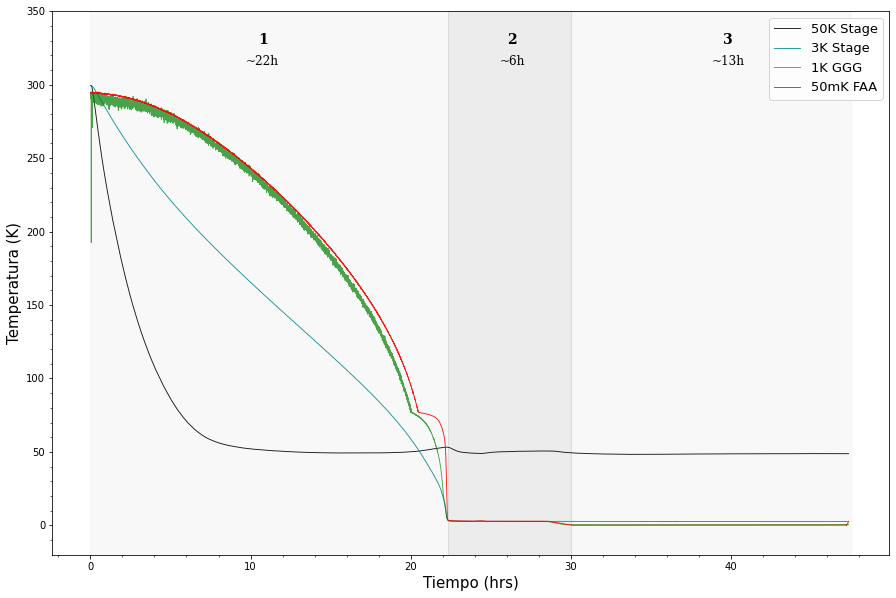

In [19]:
i=0     # Fila inicial
j=28150 # Fila final

fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(time[i:],temp_50K[i:], color='black', alpha=0.9, linewidth=0.9, label='50K Stage')
plt.plot(time[i:],temp_3K[i:], color='darkcyan', alpha=0.9, linewidth=0.9, label='3K Stage')
plt.plot(time_remove[i:],temp_GGG_remove[i:], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  
plt.plot(time[i:],temp_FAA[i:], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  
plt.ylim(-20,350)
plt.minorticks_on()  
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.legend(loc='upper right')

plt.axvspan(0, 22.3, alpha=0.05, color='grey')
plt.axvspan(22.3, 30, alpha=0.15, color='grey')
plt.axvspan(30, 47.5, alpha=0.05, color='grey')

plt.text(10.5,335, '1', 
         fontsize=14, color='black', fontfamily='serif',weight="bold",
         verticalalignment ='top', horizontalalignment ='left')
plt.text(9.7,320, '~22h', 
         fontsize=12, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')
plt.text(26,335, '2', 
         fontsize=14, color='black', fontfamily='serif',weight="bold",
         verticalalignment ='top', horizontalalignment ='left')
plt.text(25.55,320, '~6h', 
         fontsize=12, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')
plt.text(39.5,335, '3', 
         fontsize=14, color='black', fontfamily='serif',weight="bold",
         verticalalignment ='top', horizontalalignment ='left')
plt.text(38.8,320, '~13h', 
         fontsize=12, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')


plt.show()


#### Enfriamiento

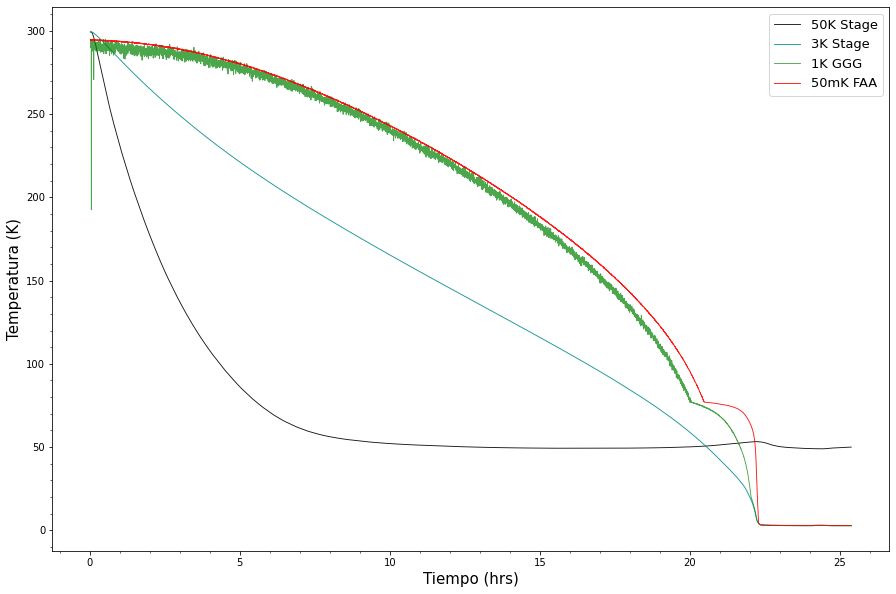

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))

i, j = 0, 15000

plt.plot(time[i:j],temp_50K[i:j], color='black', alpha=0.9, linewidth=0.9, label='50K Stage')
plt.plot(time[i:j],temp_3K[i:j], color='darkcyan', alpha=0.9, linewidth=0.9, label='3K Stage')
plt.plot(time_remove[i:j],temp_GGG_remove[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  
plt.plot(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  

plt.minorticks_on()  
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.legend(loc='upper right')
plt.show()

#### Magnetización ADR

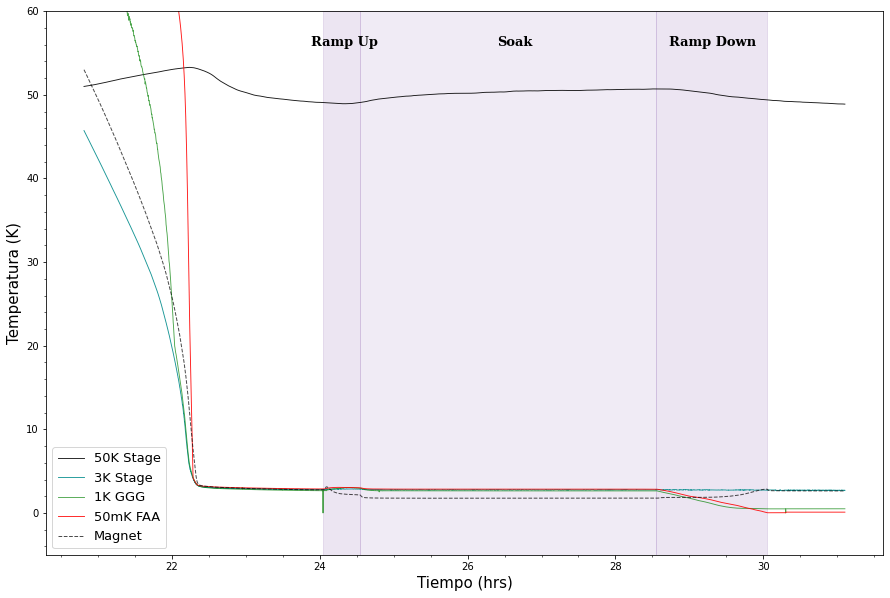

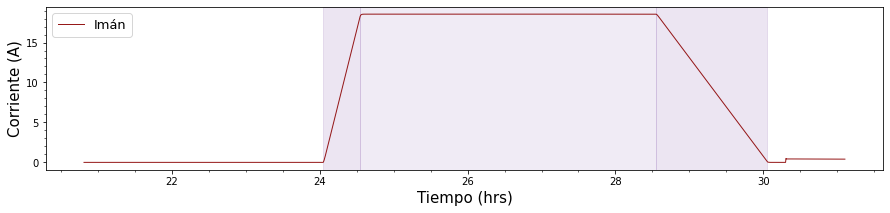

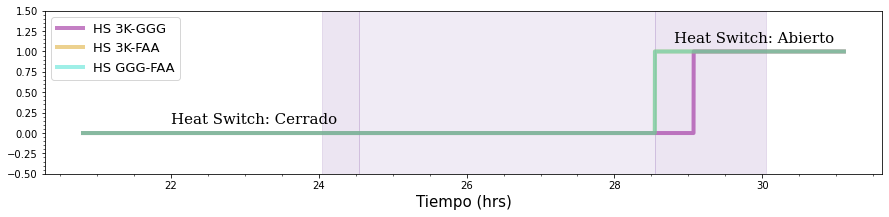

In [40]:
fig, ax = plt.subplots(figsize=(15, 10))

i, j = 12500, 18000

plt.plot(time[i:j],temp_50K[i:j], color='black', alpha=0.9, linewidth=0.9, label='50K Stage')
plt.plot(time[i:j],temp_3K[i:j], color='darkcyan', alpha=0.9, linewidth=0.9, label='3K Stage')
plt.plot(time[i:j],temp_GGG[i:j], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  
plt.plot(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  
plt.plot(time[i:j],temp_magnet[i:j], color='black', alpha=0.7, linewidth=1, ls='dashed', label='Magnet')
plt.ylim(-5,60)
plt.minorticks_on()  
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.legend()

plt.axvspan(24.05, 24.55, alpha=0.1, color='indigo') 
plt.axvspan(24.55, 28.55, alpha=0.08, color='indigo')
plt.axvspan(28.55, 30.05, alpha=0.1, color='indigo')

plt.text(23.88,57, 'Ramp Up', 
         fontsize=13, color='black', fontfamily='serif',weight="bold",
         verticalalignment ='top', horizontalalignment ='left')
plt.text(26.4,57, 'Soak', 
         fontsize=13, color='black', fontfamily='serif',weight="bold",
         verticalalignment ='top', horizontalalignment ='left')
plt.text(28.73,57, 'Ramp Down', 
         fontsize=13, color='black', fontfamily='serif',weight="bold",
         verticalalignment ='top', horizontalalignment ='left')

plt.show()



fig, ax = plt.subplots(figsize=(15,3))

plt.plot(time[i:j],i_mag[i:j], color='darkred', alpha=0.9, linewidth=1, label='Imán')
plt.minorticks_on()  
plt.legend(loc='upper left')
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Corriente (A)')

plt.axvspan(24.05, 24.55, alpha=0.1, color='indigo') 
plt.axvspan(24.55, 28.55, alpha=0.08, color='indigo')
plt.axvspan(28.55, 30.05, alpha=0.1, color='indigo')

plt.show()



fig, ax = plt.subplots(figsize=(15,3))

plt.plot(time[i:j],HS1[i:j], color='darkmagenta', alpha=0.5, linewidth=4, label='HS 3K-GGG')
plt.plot(time[i:j],HS2[i:j], color='goldenrod', alpha=0.5, linewidth=4, label='HS 3K-FAA')
plt.plot(time[i:j],HS3[i:j], color='turquoise', alpha=0.5, linewidth=4, label='HS GGG-FAA')
plt.minorticks_on()  
plt.legend()
plt.xlabel('Tiempo (hrs)')
plt.ylim(-0.5,1.5)
plt.text(28.8,1.25, 'Heat Switch: Abierto', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')
plt.text(22,0.25, 'Heat Switch: Cerrado', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.axvspan(24.05, 24.55, alpha=0.1, color='indigo') 
plt.axvspan(24.55, 28.55, alpha=0.08, color='indigo')
plt.axvspan(28.55, 30.05, alpha=0.1, color='indigo')

plt.show()

#### Control de temperatura

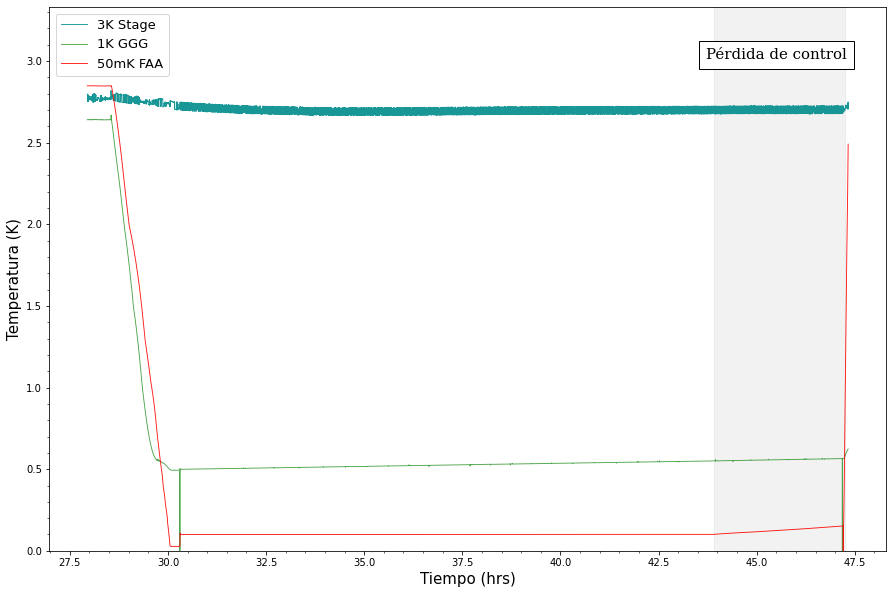

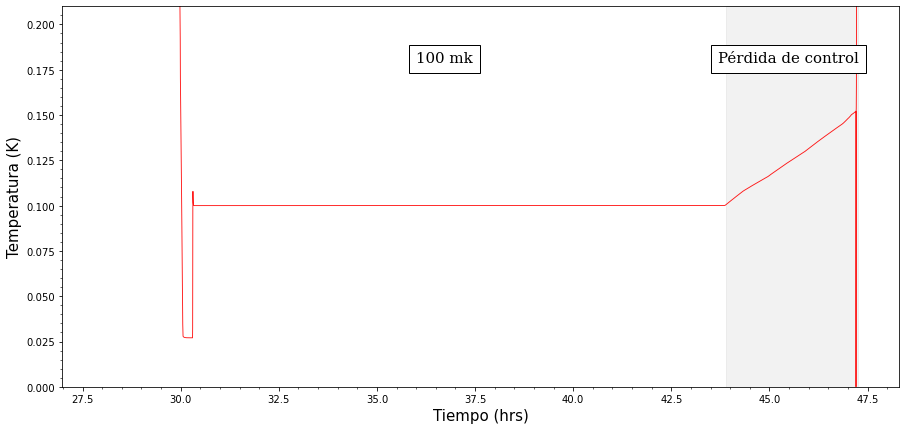

(-0.1, 0.6)

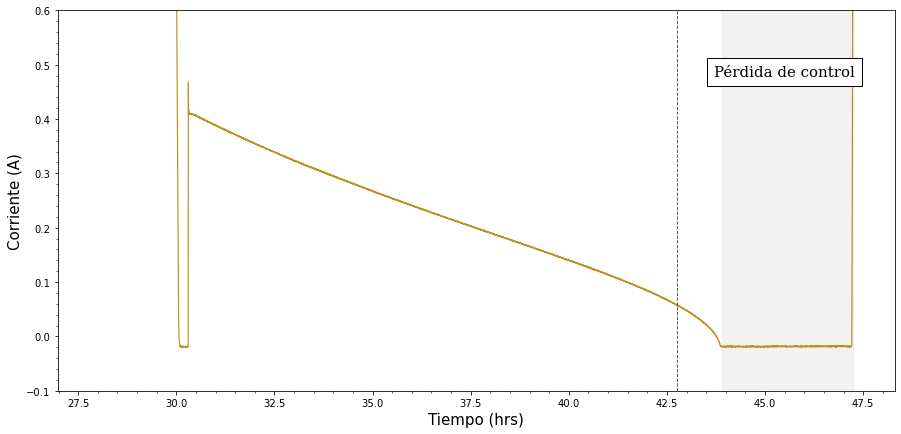

In [102]:
i = 16300

fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(time[i:],temp_3K[i:], color='darkcyan', alpha=0.9, linewidth=0.9, label='3K Stage')
plt.plot(time[i:],temp_GGG[i:], color='green', alpha=0.7, linewidth=0.9, label='1K GGG')  
plt.plot(time[i:],temp_FAA[i:], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  

plt.axvspan(43.9, 47.25, alpha=0.1, color='grey')
plt.text(43.7,3.08, 'Pérdida de control', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')

plt.minorticks_on()  
plt.ylim(0,3.33)
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.legend(loc='upper left')
plt.show()

####

fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(time[i:],temp_FAA[i:], color='red', alpha=0.9, linewidth=0.9, label='50mK FAA')  

plt.text(36,0.185, '100 mk', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')
plt.text(43.7,0.185, 'Pérdida de control', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')

plt.axvspan(43.9, 47.25, alpha=0.1, color='grey') 

plt.minorticks_on()  
plt.ylim(0,0.21)
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Temperatura (K)')
plt.show()

####

fig, ax = plt.subplots(figsize=(15,7))

plt.plot(time[i:],i_mag[i:], color='darkgoldenrod', alpha=0.9, linewidth=1.2, label='Magnet')  

plt.axvspan(43.9, 47.25, alpha=0.1, color='grey') 
plt.text(43.7,0.5, 'Pérdida de control', 
         fontsize=15, color='black', fontfamily='serif',
         bbox ={'facecolor':'white','pad':7},
         verticalalignment ='top', horizontalalignment ='left')
plt.axvline(time[k3], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')

plt.minorticks_on()
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Corriente (A)')
plt.ylim(-0.1,0.6)


 #### Estabilidad

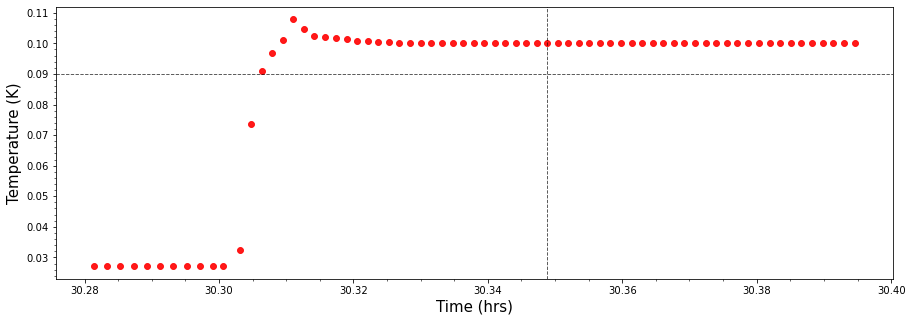

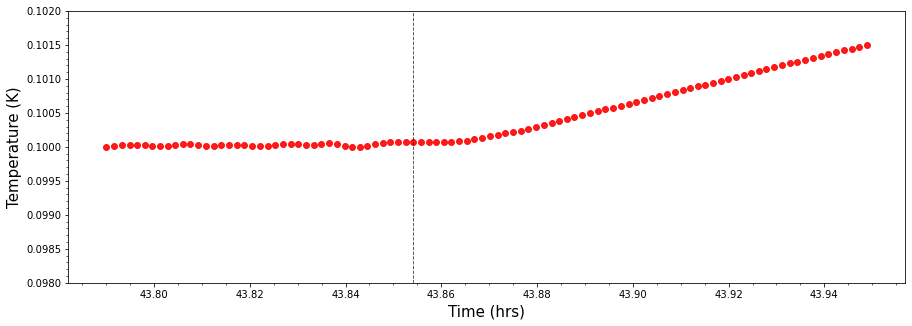

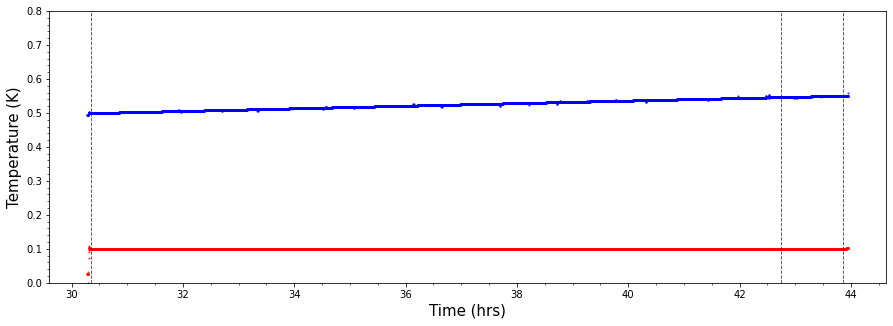

In [97]:
fig, ax = plt.subplots(figsize=(15,5))

i, j = 17480,17550
k1 = 17520

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.09, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
#plt.ylim(0.085,0.095)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')



plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 25950, 26050
k2 = 25990

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.9, linewidth=0.9, label='100mK (FAA)')  
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axhline(y=0.09, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.minorticks_on()
plt.ylim(0.098,0.102)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')


plt.show()

##########################

fig, ax = plt.subplots(figsize=(15,5))

i, j = 17480, 26050

k3 = 25300 # 43 horas

plt.scatter(time[i:j],temp_FAA[i:j], color='red', alpha=0.6, s=1.5, label='50mK (FAA)')  
plt.scatter(time[i:j],temp_GGG[i:j], color='b', alpha=0.6, s=1.5, label='1K (GGG)')  
plt.axvline(time[k1], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(time[k2], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')
plt.axvline(time[k3], ymin=0, ymax=3, color='black', alpha=0.7, linewidth=0.9, linestyle='--')

plt.minorticks_on()
plt.ylim(0.,0.800)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (K)')

plt.show()

In [100]:
import scipy
from scipy.stats import norm
from IPython.display import display, Math
from scipy import stats
from scipy.stats import pearsonr

k1 = 17520
k2 = 25990

mu_90mk_1, sigma_90mk_1 = scipy.stats.norm.fit(temp_FAA[k1:k2])

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_90mk_1, sigma_90mk_1)))

mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k2])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k2]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k2])

print(sigma_GGG, sigma_3k, sigma_50K)


<IPython.core.display.Math object>

0.014825780229543006 0.018361324272603112 0.1800512159104125


Ha trozos para quitar cuando la estabilidad se pierde

In [117]:
n = 17

t = np.array_split(time[k1:k2],n)
T = np.array_split(temp_FAA[k1:k2],n)

for i in range(n):
    mu, sigma = scipy.stats.norm.fit(T[i])
    
    print('Inicio (hrs):',t[i][0])
    print(mu, sigma)
    print()

Inicio (hrs): 30.348809
0.10000366733466934 3.545517804668054e-06

Inicio (hrs): 31.134954
0.10000345891783566 4.025944869896539e-06

Inicio (hrs): 31.923117
0.10000312825651303 3.700130416149494e-06

Inicio (hrs): 32.711421
0.1000027735470942 3.797850573842724e-06

Inicio (hrs): 33.499353
0.10000255020080322 3.8084784352538145e-06

Inicio (hrs): 34.289773
0.10000228915662651 4.140203864996039e-06

Inicio (hrs): 35.082121
0.1000021827309237 4.166314399390987e-06

Inicio (hrs): 35.876455
0.10000211044176707 3.7840623564202733e-06

Inicio (hrs): 36.668268
0.10000194979919678 3.933622184933582e-06

Inicio (hrs): 37.460645
0.10000183935742972 3.940100857568595e-06

Inicio (hrs): 38.258893
0.10000186746987952 3.824790466487342e-06

Inicio (hrs): 39.058142
0.1000018935742972 3.848370916417746e-06

Inicio (hrs): 39.858022
0.10000201004016064 3.9139719344414475e-06

Inicio (hrs): 40.657476
0.1000022530120482 4.066742497627631e-06

Inicio (hrs): 41.457038
0.10000273092369479 4.106988796929142e-

In [101]:
k1 = 17520
k3 = 25300

mu_90mk_1, sigma_90mk_1 = scipy.stats.norm.fit(temp_FAA[k1:k3])

display(Math(r'$\mu: {}\, k \\ \sigma: {} \, k$'.format(mu_90mk_1, sigma_90mk_1)))

mu_GGG, sigma_GGG = scipy.stats.norm.fit(temp_GGG[k1:k3])
mu_3k, sigma_3k = scipy.stats.norm.fit(temp_3K[k1:k3]) 
mu_50K, sigma_50K = scipy.stats.norm.fit(temp_50K[k1:k3])

print(sigma_GGG, sigma_3k, sigma_50K)

<IPython.core.display.Math object>

0.013655532274786492 0.018473784672469486 0.18123713016975454
